<a href="https://colab.research.google.com/github/SABRIS13/Machine_Learning/blob/main/Modeling_Restaurantes_Sushi_Culiacan_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Restaurantes de Sushi Culiacán

Importar bibliotecas


In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.cluster import KMeans
from sklearn import metrics

Importar dataframe

In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
culiacan=pd.read_csv('/content/drive/MyDrive/Proyecto_Dev.F/Restaurants_Location_ML/data_culiacan.csv')
culiacan=culiacan.drop(['Unnamed: 0'],axis=1).rename(columns= {'sushi':'Target'})
culiacan

,postal,Target,correoelec,Página web,telefono,per_ocu,Alimentos & Bebidas,Bibliotecas,Combustibles,Construcción,...,PASAJE Y ANDADOR COMERCIAL,"TIANGUIS, BAZAR O PULGA",Poblacion_total,Personas con discapacidad,Escolaridad promedio,Población sin seguro,Población con seguro,Población con religión,Población sin religion,Viviendas habitadas
0,0,6,278,94,212,1148,74.0,0.0,14.0,30.0,...,0.0,0.0,505341320,19890554,7728.44,105316257,398782570,442543446,61401753,145129099
1,8001,0,0,0,0,3,1.0,0.0,0.0,0.0,...,0.0,0.0,808416,31810,11.75,168516,637911,708010,98172,232201
2,80000,10,1670,570,2572,8086,298.0,8.0,9.0,36.0,...,1.0,33.0,4395427048,172954123,63996.96,916235360,3468377381,3849509310,533771321,1262495121
3,80001,0,0,0,0,2,0.0,0.0,0.0,0.0,...,0.0,0.0,808561,31817,19.43,168540,638032,708124,98203,232244
4,80002,0,0,0,0,3,0.0,0.0,0.0,1.0,...,0.0,0.0,808416,31810,11.75,168516,637911,708010,98172,232201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,82159,0,0,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,808416,31810,11.75,168516,637911,708010,98172,232201
208,82450,0,0,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,609,50,7.56,44,565,536,73,160
209,82580,0,0,0,0,2,0.0,0.0,0.0,0.0,...,0.0,0.0,1616832,63620,23.50,337032,1275822,1416020,196344,464402
210,82708,0,0,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,808416,31810,11.75,168516,637911,708010,98172,232201


In [145]:
culiacan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 56 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   postal                             212 non-null    int64  
 1   Target                             212 non-null    int64  
 2   correoelec                         212 non-null    int64  
 3   Página web                         212 non-null    int64  
 4   telefono                           212 non-null    int64  
 5   per_ocu                            212 non-null    int64  
 6   Alimentos & Bebidas                212 non-null    float64
 7   Bibliotecas                        212 non-null    float64
 8   Combustibles                       212 non-null    float64
 9   Construcción                       212 non-null    float64
 10  Correo postal                      212 non-null    float64
 11  Deportes                           212 non-null    float64

#Inspección visual

In [146]:
import plotly.express as px
df = px.data.election()
fig = px.scatter_ternary(culiacan, 
                         a="Alimentos & Bebidas", 
                         b="Escuela", 
                         c="Transporte",
                         size='Servicios médicos',
                         size_max = 40,
                         color  = "Target"
                         )
fig.show()

In [147]:
fig = px.scatter(culiacan, 
                         y="Alimentos & Bebidas", 
                         x="Servicios médicos", 
                         size='postal',
                         color= "Target")
fig.show()

In [148]:
from sklearn.decomposition import PCA
m_corr = culiacan.corr()
m_corr.style.background_gradient(cmap='YlGnBu')

,postal,Target,correoelec,Página web,telefono,per_ocu,Alimentos & Bebidas,Bibliotecas,Combustibles,Construcción,Correo postal,Deportes,Desechos,Energía,Escuela,Finanzas,Hospedaje,Juegos de azar,Licores,Maquinaria y Equipos,Mascotas,Medios de comunicación,Parques & áreas verdes,Productos médicos,Religión,Reparación vehiculos,Restaurantes,Sector primario,Servicios médicos,Tiendas,Transporte,Vestimenta,Fijo,Semifijo,AEROPUERTO,CENTRAL CAMIONERA,CENTRAL DE ABASTO,CENTRO Y PLAZA COMERCIAL,CIUDAD INDUSTRIAL,EDIFICIO COMERCIAL Y DE SERVICIOS,"HOSPITAL, CENTRO MEDICO O CLINICA",MERCADO PUBLICO,NO PLAZA,OTRO CONGLOMERADO,PARQUE INDUSTRIAL,PARQUE RECREATIVO,PASAJE Y ANDADOR COMERCIAL,"TIANGUIS, BAZAR O PULGA",Poblacion_total,Personas con discapacidad,Escolaridad promedio,Población sin seguro,Población con seguro,Población con religión,Población sin religion,Viviendas habitadas
postal,1.000000,-0.074564,-0.080194,-0.077126,-0.027334,-0.059369,-0.078105,0.009339,-0.218922,-0.163910,-0.408413,-0.033818,0.001414,0.011067,-0.007720,-0.116979,-0.010948,0.013263,-0.090228,-0.034742,-0.069057,-0.023506,0.011117,-0.083824,0.035509,-0.002069,-0.021501,-0.020420,-0.029442,0.008033,-0.316267,-0.009509,-0.047264,0.005185,-0.044898,-0.030315,-0.136957,-0.031716,0.005810,-0.042450,0.000606,-0.050270,-0.043284,-0.050261,-0.057678,0.004324,0.004032,0.003024,-0.045865,-0.045875,-0.046069,-0.045856,-0.045868,-0.045862,-0.045889,-0.045860
Target,-0.074564,1.000000,0.486655,0.504723,0.614733,0.645676,0.800107,0.231483,0.648874,0.737365,0.309231,0.441373,0.515451,0.338154,0.608416,0.474089,0.368722,0.440034,0.836245,0.328321,0.712508,0.339743,0.104766,0.571151,0.765732,0.630504,0.813968,0.073700,0.459240,0.807011,0.366219,0.413920,0.684281,0.590330,-0.012590,-0.019764,0.026732,0.481968,0.037740,0.308866,0.345897,0.213910,0.720545,0.203471,0.025219,0.013641,0.131526,0.206431,0.659600,0.659781,0.677963,0.659464,0.659637,0.659553,0.659942,0.659516
correoelec,-0.080194,0.486655,1.000000,0.991516,0.935150,0.950904,0.762314,0.745732,0.521084,0.687007,0.766494,0.892259,0.302961,0.739201,0.580323,0.929853,0.819328,0.865491,0.437962,0.710213,0.727092,0.946757,0.153148,0.949758,0.549929,0.639788,0.823632,0.178566,0.913640,0.454842,0.582030,0.880905,0.929047,0.817421,0.038829,0.014625,0.041565,0.882924,0.081578,0.862328,0.402171,0.784368,0.901608,0.426365,0.134476,0.033622,0.031864,0.787349,0.934511,0.934586,0.935338,0.934462,0.934524,0.934492,0.934644,0.934477
Página web,-0.077126,0.504723,0.991516,1.000000,0.912869,0.947539,0.760366,0.727336,0.537404,0.676837,0.734153,0.897956,0.289304,0.751530,0.590049,0.949397,0.821161,0.885773,0.431275,0.672645,0.727669,0.925737,0.151677,0.940050,0.531433,0.607562,0.823436,0.169405,0.908626,0.450132,0.587664,0.875755,0.921424,0.809516,0.054117,0.024264,0.042606,0.908972,0.073890,0.870621,0.418141,0.767391,0.889439,0.437864,0.120605,0.053039,0.038940,0.770311,0.930876,0.930932,0.928570,0.930840,0.930885,0.930862,0.930972,0.930851
telefono,-0.027334,0.614733,0.935150,0.912869,1.000000,0.962729,0.855543,0.793377,0.514925,0.720844,0.671483,0.881906,0.364594,0.700058,0.602827,0.835913,0.789217,0.826604,0.580259,0.646462,0.771828,0.909846,0.176021,0.939791,0.671959,0.733342,0.906787,0.194997,0.919908,0.600906,0.484735,0.905053,0.972290,0.879579,0.017030,0.000918,0.008059,0.853230,0.042632,0.823349,0.441833,0.790786,0.959855,0.388889,0.059908,0.039734,0.034204,0.803418,0.966959,0.967105,0.978764,0.966862,0.966985,0.966929,0.967176,0.966898
per_ocu,-0.059369,0.645676,0.950904,0.947539,0.962729,1.000000,0.895825,0.778157,0.644395,0.756402,0.675793,0.890819,0.441549,0.734113,0.712137,0.905874,0.811250,0.860787,0.624312,0.662414,0.809836,0.887771,0.198356,0.946716,0.698669,0.728246,0.934124,0.210079,0.903381,0.663834,0.591383,0.894191,0.994325,0.925456,0.043696,0.012144,0.034511,0.885052,0.128446,0.847064,0.416925,0.775594,0.981469,0.461789,0.145921,0.056989,0.084775,0.778445,0.967903,0.968106,0.990379,0.967766,0.967940,0.967853,0.968262,0.9

De lo anterior podemos hacer una breve estimaciónque las variables que tienen una correlación con el 'Target' son:


*   Alimentos & Bebidas
*  Combustibles
*  Construcción
* Licores
* Religión
* Mascotas
* Restaurantes
* Tiendas




## **Implementando KMeans**

Método del codo:
Identificar el número idoneo de clusters

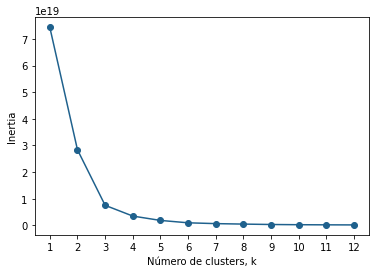

In [149]:
inertias = {k: KMeans(n_clusters=k).fit(culiacan).inertia_ for k in range(1, 13)}

plt.plot(list(inertias.keys()), 
         list(inertias.values()), '-o', color='#1F618D')
plt.xlabel('Número de clusters, k')
plt.ylabel('Inertia')
plt.xticks(list(inertias.keys()))
plt.show()

Como se desconoce la cantidad optia de clusters a clasificar los datos, se utilizo la "Regla del codo" para poder seleccionar el número de clusters. A partir de lo gráfica se seleccioron **3 clústers**.


## **KMeans**

In [150]:
model = KMeans(n_clusters=3)
model.fit(culiacan)

KMeans(n_clusters=3)

Inercia del modelo

In [151]:
model.inertia_

7.523188426774396e+18

In [152]:
model.score(culiacan)

-7.523188426774396e+18

Clusters center

In [153]:
nombres=list(culiacan.columns)
nom={}
for x in range(len(nombres)): 
  nom[x]=nombres[x]

In [154]:
model.cluster_centers_
centroides_df = (pd.DataFrame(model.cluster_centers_).rename(columns= nom))
centroides_df

,postal,Target,correoelec,Página web,telefono,per_ocu,Alimentos & Bebidas,Bibliotecas,Combustibles,Construcción,...,PASAJE Y ANDADOR COMERCIAL,"TIANGUIS, BAZAR O PULGA",Poblacion_total,Personas con discapacidad,Escolaridad promedio,Población sin seguro,Población con seguro,Población con religión,Población sin religion,Viviendas habitadas
0,80033.050847,0.480226,12.491525,4.604520,23.090395,90.802260,6.288136,0.039548,0.745763,1.265537,...,0.011299,1.665335e-16,3.467166e+07,1.366457e+06,693.646328,7.221651e+06,2.736496e+07,3.035678e+07,4.219218e+06,9.952759e+06
1,80000.000000,10.000000,1670.000000,570.000000,2572.000000,8086.000000,298.000000,8.000000,9.000000,36.000000,...,1.000000,3.300000e+01,4.395427e+09,1.729541e+08,63996.960000,9.162354e+08,3.468377e+09,3.849509e+09,5.337713e+08,1.262495e+09
2,77797.588235,6.147059,163.882353,58.058824,281.676471,1005.323529,62.470588,0.058824,4.882353,16.411765,...,0.764706,1.110223e-16,5.723178e+08,2.252011e+07,8345.165882,1.193000e+08,4.516096e+08,5.012340e+08,6.950217e+07,1.643859e+08


In [155]:
fig = px.scatter_ternary(centroides_df, 
                        a="Alimentos & Bebidas", 
                        b="Escuela", 
                        c="Transporte",
                        color  = "Target",
                         color_discrete_map ='ocean')

fig.show()

Creación de clusters

> Agregarlos a DataFrame



In [156]:
labels = model.predict(culiacan)
culiacan['cluster'] = labels

In [157]:
culiacan

,postal,Target,correoelec,Página web,telefono,per_ocu,Alimentos & Bebidas,Bibliotecas,Combustibles,Construcción,...,"TIANGUIS, BAZAR O PULGA",Poblacion_total,Personas con discapacidad,Escolaridad promedio,Población sin seguro,Población con seguro,Población con religión,Población sin religion,Viviendas habitadas,cluster
0,0,6,278,94,212,1148,74.0,0.0,14.0,30.0,...,0.0,505341320,19890554,7728.44,105316257,398782570,442543446,61401753,145129099,2
1,8001,0,0,0,0,3,1.0,0.0,0.0,0.0,...,0.0,808416,31810,11.75,168516,637911,708010,98172,232201,0
2,80000,10,1670,570,2572,8086,298.0,8.0,9.0,36.0,...,33.0,4395427048,172954123,63996.96,916235360,3468377381,3849509310,533771321,1262495121,1
3,80001,0,0,0,0,2,0.0,0.0,0.0,0.0,...,0.0,808561,31817,19.43,168540,638032,708124,98203,232244,0
4,80002,0,0,0,0,3,0.0,0.0,0.0,1.0,...,0.0,808416,31810,11.75,168516,637911,708010,98172,232201,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,82159,0,0,0,0,1,0.0,0.0,0.0,0.0,...,0.0,808416,31810,11.75,168516,637911,708010,98172,232201,0
208,82450,0,0,0,0,1,0.0,0.0,0.0,0.0,...,0.0,609,50,7.56,44,565,536,73,160,0
209,82580,0,0,0,0,2,0.0,0.0,0.0,0.0,...,0.0,1616832,63620,23.50,337032,1275822,1416020,196344,464402,0
210,82708,0,0,0,0,1,0.0,0.0,0.0,0.0,...,0.0,808416,31810,11.75,168516,637911,708010,98172,232201,0


In [158]:
#Contar cuantos valores tiene cada cluster
culiacan['cluster'].value_counts()

0    177
2     34
1      1
Name: cluster, dtype: int64

Analisis de los datos correspondientes a cada cluster, con el objetivo de poder renombrarlos.

In [159]:
cluster=pd.pivot_table(culiacan, index='cluster').reset_index()
cluster.loc[:,:'Finanzas']

,cluster,AEROPUERTO,Alimentos & Bebidas,Bibliotecas,CENTRAL CAMIONERA,CENTRAL DE ABASTO,CENTRO Y PLAZA COMERCIAL,CIUDAD INDUSTRIAL,Combustibles,Construcción,Correo postal,Deportes,Desechos,EDIFICIO COMERCIAL Y DE SERVICIOS,Energía,Escolaridad promedio,Escuela,Fijo,Finanzas
0,0,0.067797,6.288136,0.039548,0.853107,0.118644,2.118644,0.00565,0.745763,1.265537,0.062147,0.101695,0.316384,0.327684,0.016949,693.646328,2.276836,63.960452,1.468927
1,1,0.000000,298.000000,8.000000,0.000000,0.000000,461.000000,0.00000,9.000000,36.000000,9.000000,30.000000,3.000000,423.000000,5.000000,63996.960000,133.000000,5244.000000,160.000000
2,2,0.294118,62.470588,0.058824,0.382353,0.205882,27.676471,0.00000,4.882353,16.411765,1.205882,1.470588,2.882353,8.852941,0.323529,8345.165882,29.794118,699.794118,14.705882


In [160]:
cluster.loc[:,'Finanzas':'Población con seguro']

,Finanzas,"HOSPITAL, CENTRO MEDICO O CLINICA",Hospedaje,Juegos de azar,Licores,MERCADO PUBLICO,Maquinaria y Equipos,Mascotas,Medios de comunicación,NO PLAZA,OTRO CONGLOMERADO,PARQUE INDUSTRIAL,PARQUE RECREATIVO,PASAJE Y ANDADOR COMERCIAL,Parques & áreas verdes,Personas con discapacidad,Poblacion_total,Población con religión,Población con seguro
0,1.468927,0.000000,0.338983,0.067797,1.858757,0.327684,0.587571,0.367232,0.344633,62.214689,0.322034,0.288136,0.000000,0.011299,0.050847,1.366457e+06,3.467166e+07,3.035678e+07,2.736496e+07
1,160.000000,62.000000,46.000000,13.000000,23.000000,210.000000,25.000000,13.000000,135.000000,4233.000000,33.000000,0.000000,0.000000,1.000000,1.000000,1.729541e+08,4.395427e+09,3.849509e+09,3.468377e+09
2,14.705882,5.382353,2.617647,0.970588,15.205882,0.735294,5.676471,3.941176,6.264706,672.352941,3.794118,0.823529,0.029412,0.764706,0.176471,2.252011e+07,5.723178e+08,5.012340e+08,4.516096e+08


In [161]:
cluster.loc[:,'Población con seguro':'Target']

,Población con seguro,Población sin religion,Población sin seguro,Productos médicos,Página web,Religión,Reparación vehiculos,Restaurantes,Sector primario,Semifijo,Servicios médicos,"TIANGUIS, BAZAR O PULGA",Target
0,2.736496e+07,4.219218e+06,7.221651e+06,0.796610,4.604520,0.779661,5.593220,6.915254,2.531073,2.694915,1.807910,0.0,0.480226
1,3.468377e+09,5.337713e+08,9.162354e+08,89.000000,570.000000,16.000000,165.000000,368.000000,27.000000,212.000000,578.000000,33.0,10.000000
2,4.516096e+08,6.950217e+07,1.193000e+08,10.323529,58.058824,8.058824,60.911765,77.529412,4.294118,21.500000,35.764706,0.0,6.147059


In [162]:
cluster.loc[:,'Target':]

,Target,Tiendas,Transporte,Vestimenta,Viviendas habitadas,correoelec,per_ocu,postal,telefono
0,0.480226,10.576271,1.062147,2.220339,9.952759e+06,12.491525,90.802260,80033.050847,23.090395
1,10.000000,176.000000,25.000000,607.000000,1.262495e+09,1670.000000,8086.000000,80000.000000,2572.000000
2,6.147059,89.764706,7.647059,24.441176,1.643859e+08,163.882353,1005.323529,77797.588235,281.676471


El clusters 1 corresponde solo a un solo código postal y debido a la gran cantidad de tiendas, productos médidos, servicios médicos, venta de Alimentos y Bebidas, se llamará como: **"Capitolio"**. Al cluster 0 debido a los valores bajos de infraestructura, tiendas y demás servicios, se renombrará **Zona cero**. Finalmente al cluster 2 por sus valores intermedios entre los anteriores se renombrará **Termino Medio**

In [163]:
cluster.loc[:,'cluster']=cluster['cluster'].replace([0, 1, 2] ,['Zona cero','Capitolio','Termino Medio'])
cluster[['cluster','Target']]

,cluster,Target
0,Zona cero,0.480226
1,Capitolio,10.000000
2,Termino Medio,6.147059


In [164]:
grupos=cluster[['cluster']].reset_index()
grupos

,index,cluster
0,0,Zona cero
1,1,Capitolio
2,2,Termino Medio


In [165]:
#Unir clusters renombrado con el dataset originalde culican (Que contiene los datos del CP)
grupos=cluster[['cluster']].reset_index()
data_grupos=culiacan.merge(grupos, how = 'left', left_on='cluster', right_on = 'index')
data_grupos=data_grupos.drop(columns=['index']).rename(columns={'cluster_x':'Cluster','cluster_y':'Clasificación'})
data_grupos[['postal','Target','Poblacion_total','Cluster','Clasificación']].sort_values(by=['Cluster','Poblacion_total'], ascending=False).head(10)

,postal,Target,Poblacion_total,Cluster,Clasificación
96,80200,4,1409097327,2,Termino Medio
15,80020,13,1256279113,2,Termino Medio
83,80180,12,1046898720,2,Termino Medio
36,80060,8,925636320,2,Termino Medio
125,80290,13,782546688,2,Termino Medio
44,80090,5,725967354,2,Termino Medio
6,80010,8,714639945,2,Termino Medio
91,80194,14,696046211,2,Termino Medio
28,80050,12,676644192,2,Termino Medio
34,80058,11,650775915,2,Termino Medio


Selección de variables relevantes a traves de Regresión de Lasso


In [166]:
X = culiacan.drop(columns = 'Target').values
y = culiacan['Target'].values

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [168]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_d = scaler.transform(X)

In [169]:
reg = Lasso(random_state=0)

In [170]:
params_grid = {'alpha': [100, 30, 10, 5, 1, 0.1, .01, 0.001, 0.0001, 0.00001, 0.000001]}

In [171]:
grid_lasso_search = GridSearchCV(estimator=reg,
                               param_grid=params_grid,
                               scoring='neg_root_mean_squared_error',
                               n_jobs=-1,
                               verbose = True,
                               cv=6,
                               refit=True, 
                               return_train_score=True)

In [172]:
%%time
grid_lasso_search.fit(X_train,y_train)

Fitting 6 folds for each of 11 candidates, totalling 66 fits
CPU times: user 187 ms, sys: 39.2 ms, total: 226 ms
Wall time: 1.51 s


GridSearchCV(cv=6, estimator=Lasso(random_state=0), n_jobs=-1,
             param_grid={'alpha': [100, 30, 10, 5, 1, 0.1, 0.01, 0.001, 0.0001,
                                   1e-05, 1e-06]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=True)

In [173]:
grid_lasso_search.best_params_

{'alpha': 0.01}

Modelo usando los mejores parametros Lasso

In [174]:
reg= Lasso(alpha=0.01).fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(f'R^2: {metrics.r2_score(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

R^2: 0.8804550438796538
RMSE: 0.9531609543919338


In [175]:
lasso_coef = reg.coef_
print(lasso_coef)

[ 0.          0.          0.          0.          0.          0.0402949
 -2.65395505 -0.46341664  4.2686867  -0.          0.         -0.
 -0.          0.08055488 -0.         -0.         -0.          8.07717881
 -0.91663094  0.         -0.         -0.          0.          0.
 -4.32676802 10.54052902 -0.61497412  0.          0.         -2.61713
  0.          0.         -0.         -0.          0.          0.
  0.         -0.         -0.          1.81600063 -0.          0.
 -0.07892751 -0.         -0.          0.         -0.          0.
  0.          0.          0.          0.          0.          0.
  0.          1.235401  ]


In [176]:
df_columns = culiacan.drop(columns = ['Target']).columns
coeficientes = pd.DataFrame(pd.Series(lasso_coef, index=df_columns).sort_values(ascending=True))
coeficientes=coeficientes.reset_index().rename(columns={'index':'Variable',0:'Coeficiente'})
coeficientes

,Variable,Coeficiente
0,Reparación vehiculos,-4.326768
1,Bibliotecas,-2.653955
2,Transporte,-2.617130
3,Maquinaria y Equipos,-0.916631
4,Sector primario,-0.614974
5,Combustibles,-0.463417
6,OTRO CONGLOMERADO,-0.078928
7,Población sin seguro,0.000000
8,Fijo,0.000000
9,Población sin religion,0.000000


In [177]:
#Las variables con un coeficiente 0 son variables que no influyen en el establecimiento de un resturante de sushi, 
#de forma contraria las demás variables si influye en el modelado. 



> Variables de interes



In [190]:
var_int

,Variable,Coeficiente
0,Reparación vehiculos,-4.326768
1,Bibliotecas,-2.653955
2,Transporte,-2.617130
3,Maquinaria y Equipos,-0.916631
4,Sector primario,-0.614974
5,Combustibles,-0.463417
6,OTRO CONGLOMERADO,-0.078928
49,Alimentos & Bebidas,0.040295
50,Escuela,0.080555
51,cluster,1.235401


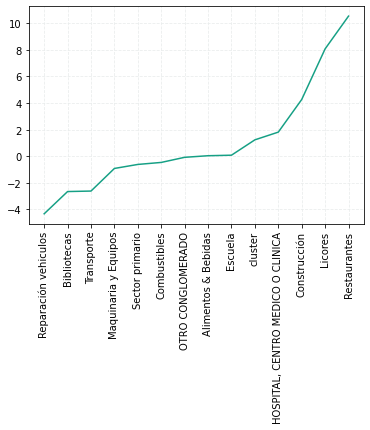

In [178]:
var_int=(coeficientes[coeficientes['Coeficiente']!=0])
plt.plot('Variable', 'Coeficiente',data=var_int, color='#16A085')
plt.xticks(rotation=90)
plt.grid(color = '#EAEDED', linestyle = 'dashed')
plt.show()

In [187]:
data_prediccion_sushis=data_grupos
data_prediccion_sushis['Sushis Prediccion']=reg.predict(X_d)
data_prediccion_sushis=data_prediccion_sushis[['postal','Target','Poblacion_total','Cluster','Clasificación','Sushis Prediccion','Licores','Restaurantes']].sort_values(by=['Sushis Prediccion','Cluster'], ascending=False).head(10)
data_prediccion_sushis

,postal,Target,Poblacion_total,Cluster,Clasificación,Sushis Prediccion,Licores,Restaurantes
15,80020,13,1256279113,2,Termino Medio,10.904872,25.0,168.0
2,80000,10,4395427048,1,Capitolio,10.811103,23.0,368.0
91,80194,14,696046211,2,Termino Medio,10.630259,33.0,120.0
28,80050,12,676644192,2,Termino Medio,10.213929,19.0,104.0
161,80430,8,57814893,0,Zona cero,9.805635,42.0,155.0
34,80058,11,650775915,2,Termino Medio,9.652620,20.0,125.0
83,80180,12,1046898720,2,Termino Medio,9.268302,32.0,141.0
94,80197,9,550531559,2,Termino Medio,8.783984,28.0,66.0
125,80290,13,782546688,2,Termino Medio,8.745033,23.0,107.0
88,80190,6,608737248,2,Termino Medio,8.662735,23.0,86.0


De lo anterior los 10 lugares en los cuales hay una gran cantidad de puestos/restaurantes de sushi están en los CP: 
* 80020
* 80000
* 80194
* 80050
* 80430
* 80058
* 80180
* 80187
* 80290
* 80190




## **Conclusión**

A partir del análisis anterior se recomendaría abrir un restaurantes de sushi en los CP clasificados en los **clusters** de **1** y **2**, correspondientes al **"Capitolio"** y **"Término Medio"**. 

Comprobando lo anterior se hizo una predicción de los CP que cuentan con una cantidad considerable de sushis se encuentran en estos clusters, con una ligera excepción del cluster 0 ('Zona cero').

\begin{array}{ccc}
\text{CP}\\
       80020
\\  80000
\\    80194
\\   80050
\\  80430
\\    80058
\\    80180
\\    80197
\\   80290
\\    80190
\end{array}



Aunado a ello las 5 variables de mayor relevancia obtenidas del análisis son: 

\begin{array}{ccc}
\text{Variables de influencia}&\text{Coeficiente}\\
Reparacion \hspace{1em} vehiculos	& -4.326768
\\ Bibliotecas	& -2.653955
\\ Construccion	&4.268687
\\ Licores	& 8.077179
\\ Restaurantes & 10.540529
\end{array}
